# Global Carbon Dioxide (C02) Emissions
Carbon dioxide (CO2) is an odorless gas that is highly important to life on Earth however it is a greenhouse gas and its excessive concentration disrupts the natural regulation of temperature in the atmosphere.

As one of the most abundant and harmful greenhouse gas, CO2 has been receiving increasing attention. The concentration of CO2 has especially increased as a result of the Industrial Revolution and exponential growth in manufacturing activities around the world; deforestation, agriculture, and fossil fuel use are the primary sources of CO2.

In this project, a dataset is used which was put together by [Our World in Data](https://ourworldindata.org/), an organisation set out to make the knowledge on the big problems accessible and understandable by publishing relevant research and data.

The data set used in this project is available in [this github repository](https://github.com/owid/co2-data). It is a collection of key metrics related to CO2 emissions. The columns in the dataset are described below:

- **Country** - Country name
- **ISO 3166-1 alpha-3** - ISO code
- **Year** - Year (calender year)
- **Total** - Total fossil CO2 emissions in millions of tonnes of CO2
- **Coal** - Fossil CO2 emissions from Coal in millions of tonnes of CO2
- **Oil** - Fossil CO2 emissions from Oil in millions of tonnes of CO2
- **Gas** - Fossil CO2 emissions from Gas in millions of tonnes of CO2
- **Cement** - Fossil CO2 emissions from Cement in millions of tonnes of CO2
- **Flaring** - Fossil CO2 emissions from Flaring in millions of tonnes of CO2
- **Other** - Fossil CO2 emissions from Other in millions of tonnes of CO2
- **Per Capita** - Per capita fossil CO2 emissions in tonnes of CO2 per capita

The aim of this project is to analyse the available data to provide an understanding of the growth rate of global CO2 emissions and the countries and industries driving this growth. Based on this goal, the following research questions (RQs) are defined:

**RQ1** : What is the trend of CO2 emissions over the years?

**RQ2** : What are the factors driving the observed trend?
-- What is(are) the largest CO2 emitting country(s)?
-- What is(are) the largest CO2 emitting industry(s)?

The research questions are answered using analysis and visualisation of the data and results are certified using hypothesis testing with a universal significance leve (p-value) of 5%.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

## Data Exploration

In [109]:
climate_data = pd.read_csv('GCB2021v34_MtCO2_flat.csv', encoding='latin-1')
climate_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62872 entries, 0 to 62871
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             62872 non-null  object 
 1   ISO 3166-1 alpha-3  61246 non-null  object 
 2   Year                62872 non-null  int64  
 3   Total               62672 non-null  float64
 4   Coal                21519 non-null  float64
 5   Oil                 21485 non-null  float64
 6   Gas                 21387 non-null  float64
 7   Cement              22214 non-null  float64
 8   Flaring             21319 non-null  float64
 9   Other               1573 non-null   float64
 10  Per Capita          18749 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [111]:
climate_data.Year.unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [112]:
print('Available data is between', climate_data.Year.unique()[0], 'and', climate_data.Year.unique()[-1])

Available data is between 1750 and 2020


## Data Analysis
## What is the trend of CO2 emissions over the years?

In [113]:
# slicing dataset to get relevant columns for this section
climate_data_totals = climate_data[['Country', 'Year', 'Total', 'Per Capita']]

In [114]:
climate_data_tots = climate_data_totals.groupby('Year').sum()
climate_data_tots = climate_data_tots.reset_index()
climate_data_tots.columns

Index(['Year', 'Total', 'Per Capita'], dtype='object')

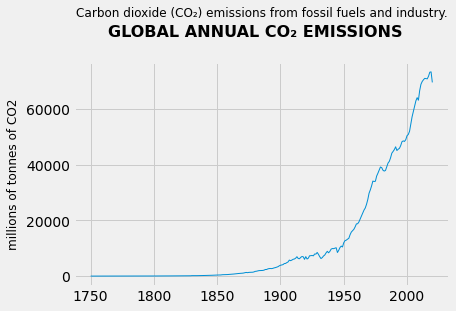

In [115]:
# visualising total global co2 emissions from 1750 to 2020
plt.style.use('fivethirtyeight')
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fig.suptitle('GLOBAL ANNUAL CO₂ EMISSIONS', fontsize=16, fontweight='bold')
ax.set_title('Carbon dioxide (CO₂) emissions from fossil fuels and industry.', fontsize = 12)
# ax.set_title('axes title')

plt.plot(climate_data_tots['Year'], climate_data_tots['Total'], linewidth = 1)
plt.ylabel('millions of tonnes of CO2', fontsize= 12, labelpad=6)
plt.show()

# TABLEAU ADDS: TOP 5 contributing countries for that year in tooltip

### Optimal Range of years to define "past" and "present"

There is a notable spike that begins around 1925 and gets steeper in 1950. An optimal range to define the years within which the growth increases is necessary here to account for countries who may not have had full reporting available in those years.

In [116]:
# Finding the optimal "past" year to use as reference based on the data available
sum_of_none = dict()
for year in climate_data_tots['Year'].unique():
    climate_data_year = climate_data[climate_data['Year'] == year]
    zero_totals = climate_data_year[(climate_data_year['Total'] == 0.0) | (climate_data_year['Total'].isnull())].shape[0]
    zero_per_cap = climate_data_year[(climate_data_year['Per Capita'] == 0.0) | (climate_data_year['Per Capita'].isnull())].shape[0]

    sum_of_none[year] = (zero_totals, zero_per_cap)


sum_of_none

{1750: (230, 231),
 1751: (230, 231),
 1752: (230, 231),
 1753: (230, 231),
 1754: (230, 231),
 1755: (230, 231),
 1756: (230, 231),
 1757: (230, 231),
 1758: (230, 231),
 1759: (230, 231),
 1760: (230, 231),
 1761: (230, 231),
 1762: (230, 231),
 1763: (230, 231),
 1764: (230, 231),
 1765: (230, 231),
 1766: (230, 231),
 1767: (230, 231),
 1768: (230, 231),
 1769: (230, 231),
 1770: (230, 231),
 1771: (230, 231),
 1772: (230, 231),
 1773: (230, 231),
 1774: (230, 231),
 1775: (230, 231),
 1776: (230, 231),
 1777: (230, 231),
 1778: (230, 231),
 1779: (230, 231),
 1780: (230, 231),
 1781: (230, 231),
 1782: (230, 231),
 1783: (230, 231),
 1784: (230, 231),
 1785: (229, 231),
 1786: (229, 231),
 1787: (229, 231),
 1788: (229, 231),
 1789: (229, 231),
 1790: (229, 231),
 1791: (229, 231),
 1792: (228, 231),
 1793: (228, 231),
 1794: (228, 231),
 1795: (228, 231),
 1796: (228, 231),
 1797: (228, 231),
 1798: (228, 231),
 1799: (228, 231),
 1800: (226, 231),
 1801: (226, 231),
 1802: (224,

#### Findings:

Past = Beginning of spike
Present = Now

From the 70-100 years ago spike in the trends, the earlies date with the least amount of 0 values for both Totals and Per Capital is 1950 (ie. 70 years ago). We can test the statistical significance of the difference between the two groups.

In [117]:
climate_data_1950 = climate_data_totals[climate_data['Year'] == 1950]
climate_data_2020 = climate_data_totals[climate_data['Year'] == 2020]

for dataframe, year in zip([climate_data_1950, climate_data_2020], [1950, 2020]):
    mapper = dict()
    for col in dataframe.columns[1:]:
        mapper[col] = '{}_{}'.format(col.replace(' ', '_'), year)
    dataframe.rename(columns=mapper, inplace=True)

climate_data_70 = pd.merge(climate_data_1950, climate_data_2020)
climate_data_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          232 non-null    object 
 1   Year_1950        232 non-null    int64  
 2   Total_1950       232 non-null    float64
 3   Per_Capita_1950  231 non-null    float64
 4   Year_2020        232 non-null    int64  
 5   Total_2020       232 non-null    float64
 6   Per_Capita_2020  231 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 14.5+ KB


/var/folders/x7/jzsq9_p147140fb1mm83f8_c0000gn/T/ipykernel_2323/1250429865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.rename(columns=mapper, inplace=True)
/var/folders/x7/jzsq9_p147140fb1mm83f8_c0000gn/T/ipykernel_2323/1250429865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.rename(columns=mapper, inplace=True)


The null per capita values are due to the row belonging to 'International Transport'. It can't have a population and therefore can't have a per capita value. Given the annual totals known, an average amount of fliers per year can be used to estimate this value.

### Statistically significant difference between 1950 and 2020 data
#### _with a paired samples t-test_

**Conditions for paired sample t-test:**
1. Independence of observations.
Subjects must be independent. Measurements for one subject do not affect measurements for any other subject.
2. The measured differences are normally distributed.
3. Each of the paired measurements must be obtained from the same subject.


### 1. Testing independence of observation with Durbin-Watson

H~O~ (null hypothesis): There is no correlation among the residuals.
H~A~ (alternative hypothesis): The residuals are autocorrelated.

In [118]:
import statsmodels.formula.api as sm
from statsmodels.stats.stattools import durbin_watson

reg_PC = sm.ols('Per_Capita_2020~Per_Capita_1950', data=climate_data_70).fit()
# reg_PC.summary()

reg_tot = sm.ols('Total_2020~Total_1950', data=climate_data_70).fit()
# reg_tot.summary()

In [119]:
print('Per Capita Distribution has independence of observation:', round(durbin_watson(reg_PC.resid)) == 2)

print('Total Distribution has independence of observation:', round(durbin_watson(reg_tot.resid)) == 2)

Per Capita Distribution has independence of observation: True
Total Distribution has independence of observation: True


### Testing Normality of Differences with Shapiro Wilk

H~0~(null): Sample is from the normal distributions.
H~A~(alternative): Sample is not from the normal distributions.

In [120]:
climate_data_70['diff_per_cap'] = climate_data_70['Per_Capita_2020'] - climate_data_70['Per_Capita_1950']
print('Per Capita data is normally distributed:',stats.shapiro(climate_data_70['diff_per_cap'])[1] > 0.05)

climate_data_70['diff_total'] = climate_data_70['Total_2020'] - climate_data_70['Total_1950']
print('Total Data is normally distributed:', stats.shapiro(climate_data_70['diff_total'])[1] > 0.05)

Per Capita data is normally distributed: True
Total Data is normally distributed: False


#### Findings:

Since all assumptions can be met for the per capita column, the paired samples t-test can be used to compare means via a t-test.

 The test may still be run for the Total column since the sample size is large enough (usually over 20 items) [according to this source](https://www.statisticshowto.com/probability-and-statistics/non-normal-distributions/).

### Validating Difference in data between 1950 and 2020 using a Paired Samples T-test

H~0~: Difference in group means is zero
H~A~: Difference in group means is different from zero

In [121]:
clim_data_CO = climate_data_70.dropna() #only international travel is dropped

pc_ttest = stats.ttest_rel(clim_data_CO['Per_Capita_2020'], clim_data_CO['Per_Capita_1950'])
tot_ttest = stats.ttest_rel(clim_data_CO['Total_2020'], clim_data_CO['Total_1950'])

print('Per Capita data p-value:', pc_ttest[1])
print('Total data p-value:', tot_ttest[1])

Per Capita data p-value: 0.8085281191018315
Total data p-value: 0.0666536048279912


#### Findings

Since the significance value (p-value) for the Per Capita > 5%, there is no statistically significant evidence to show that there is difference in means between the two carbon emissions per capita in 1950 and 2020.

However, there is nearly statistically significant difference between the means of the Total data (p-value = 0.07).

Since Per capita emission is a metric of CO2 emissions per citizen of each respect country, this result suggests that the growth rate of emissions is directly related to the increase in population over the years.

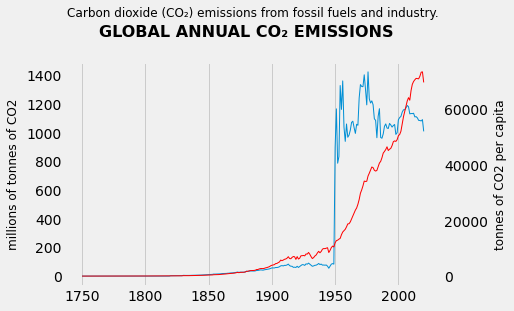

In [122]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid(visible=None, axis='y')
ax2 = ax.twinx()
ax2.grid(False)
fig.subplots_adjust(top=0.85)

fig.suptitle('GLOBAL ANNUAL CO₂ EMISSIONS', fontsize=16, fontweight='bold')
ax.set_title('Carbon dioxide (CO₂) emissions from fossil fuels and industry.', fontsize = 12)
# ax.set_title('axes title')

ax.plot(climate_data_tots['Year'], climate_data_tots['Per Capita'], linewidth = 1)
ax2.plot(climate_data_tots['Year'], climate_data_tots['Total'], linewidth=1, color='red')

ax.set_ylabel('millions of tonnes of CO2', fontsize= 12, labelpad=6)
ax2.set_ylabel('tonnes of CO2 per capita', fontsize= 12, labelpad=6)

plt.show()

## Carbon Emissions by Country

In [123]:
climate_data_2000 = climate_data[climate_data['Year'] > 2000]
climate_data_2000 = climate_data_2000.groupby(by='Country').sum()
top_20 = climate_data_2000['Total'].sort_values(ascending=False).head(21).reset_index()

global_total= top_20.iloc[0]['Total']
top_20['Percent_of_global'] = 100 * (top_20['Total']/ global_total)

top_20 = top_20.iloc[1:].sort_values('Total')

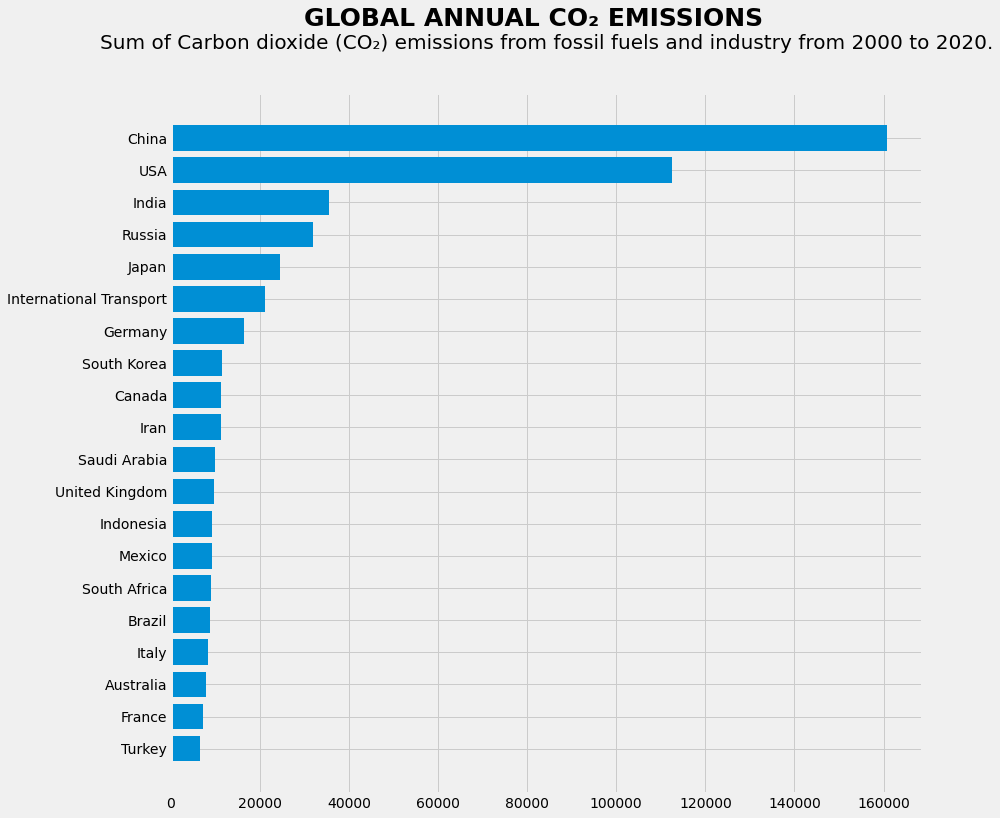

In [124]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()
# fig.subplots_adjust(top=0.85)

fig.suptitle('GLOBAL ANNUAL CO₂ EMISSIONS', fontsize=25, fontweight='bold')
ax.set_title('Sum of Carbon dioxide (CO₂) emissions from fossil fuels and industry from 2000 to 2020.', fontsize = 20)
plt.barh(top_20['Country'], top_20['Total'])

plt.show()

In [125]:
climate_data_2000['Percent_of_global'] = 100 * (climate_data_2000['Total']/ global_total)

rel_ch = climate_data_2000[['Total', 'Percent_of_global']].reset_index()
rel_ch = rel_ch.sort_values('Total', ascending=False).iloc[1:]

others = rel_ch.iloc[6:].sum()
others['Country'] = 'Others'

commy = rel_ch.iloc[:6].append(others, ignore_index=True)
commy = commy.sort_values('Percent_of_global')
commy

/var/folders/x7/jzsq9_p147140fb1mm83f8_c0000gn/T/ipykernel_2323/13631172.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  commy = rel_ch.iloc[:6].append(others, ignore_index=True)


,Country,Total,Percent_of_global
5,International Transport,21074.726441,3.234926
4,Japan,24615.772881,3.778469
3,Russia,32021.096255,4.915170
2,India,35476.765078,5.445608
1,USA,112410.323054,17.254745
0,China,160679.979634,24.664035
6,Others,265196.174407,40.707048


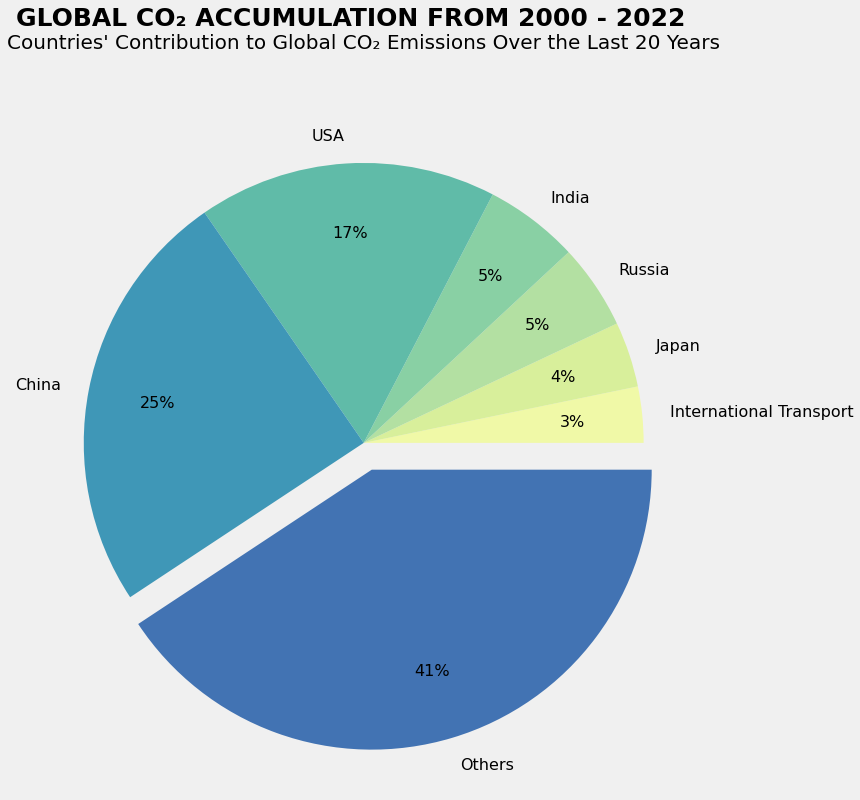

In [126]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()

fig.suptitle('GLOBAL CO₂ ACCUMULATION FROM 2000 - 2022', fontsize=25, fontweight='bold')
ax.set_title('Countries\' Contribution to Global CO₂ Emissions Over the Last 20 Years', fontsize = 20)

colors =['#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']
explode = (0, 0, 0, 0, 0, 0, 0.1)

plt.pie(x=commy['Total'], autopct='%1.0f%%', labels=commy['Country'], colors=colors, explode=explode, pctdistance=0.75, textprops={'fontsize': 16})

plt.show()

It is interesting to find that out of about 230 countires, the top 5 CO₂ emmiting countries - USA, China, India, Russia and Japan - account for more than half of the Globe's emissions. The next highest contributor is international transport which accounts for 3% of the Globe's emissions.

## Carbon Emissions by Industry

In [127]:
#defining top 5 contributing countries based on accumulated contributions over the last 20 years
top_5_countries = [x for x in commy['Country'].unique()]
top_5_countries = top_5_countries[1:]

climate_data_2000_avgs = climate_data[climate_data['Year'] > 2000]
climate_data_2000_avgs = climate_data_2000_avgs.groupby(by='Country').mean()
climate_data_2000_avgs = climate_data_2000_avgs.reset_index()

indy = climate_data_2000_avgs[climate_data_2000_avgs.Country.isin(top_5_countries)]
indy =  indy[['Country', 'Total', 'Year', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].fillna(0)
indy = indy.sort_values('Total', ascending=False)
indy.Total = indy.Total/1000 # converting unit from Million (M) tons to Billion (B) tons per annum (PA)
indy

,Country,Total,Year,Coal,Oil,Gas,Cement,Flaring,Other
41,China,8.033999,2010.5,5929.628368,1105.123121,260.308298,604.188167,0.000000,134.751028
218,USA,5.620516,2010.5,1792.043450,2340.568726,1370.354858,39.933159,49.897761,27.718198
93,India,1.773838,2010.5,1118.258249,469.860383,92.811677,90.915644,1.992301,0.000000
171,Russia,1.601055,2010.5,412.626944,353.471952,764.411331,22.155692,32.954056,15.434837
102,Japan,1.230789,2010.5,434.313533,542.094642,216.774991,28.117705,0.482312,9.005460


In [128]:
import matplotlib
import colorsys

# defining color spectra for donut plots
def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s=s)

color = matplotlib.colors.ColorConverter.to_rgb("navy")
rgbs = [scale_lightness(color, scale) for scale in [0, .5, 1, 1.5, 2]]

colors_in_rgb = [matplotlib.colors.ColorConverter.to_rgb(col) for col in ['navy', 'orange', 'firebrick', 'orchid', 'yellow']]

colors1 = [scale_lightness(colors_in_rgb[0], scale) for scale in [2.25, 2.5, 2.75, 3, 3.25, 3.5]]
colors2 = [scale_lightness(colors_in_rgb[1], scale) for scale in [0.5, 0.75, 1, 1.25, 1.5, 1.75,]]
colors3 = [scale_lightness(colors_in_rgb[2], scale) for scale in [1, 1.25, 1.5, 1.75, 2, 2.25]]
colors4 = [scale_lightness(colors_in_rgb[3], scale) for scale in [0.25, 0.5, 0.75, 1, 1.25, 1.5]]
colors5 = [scale_lightness(colors_in_rgb[4], scale) for scale in [0.25, 0.5, 0.75, 1, 1.25, 1.5]]

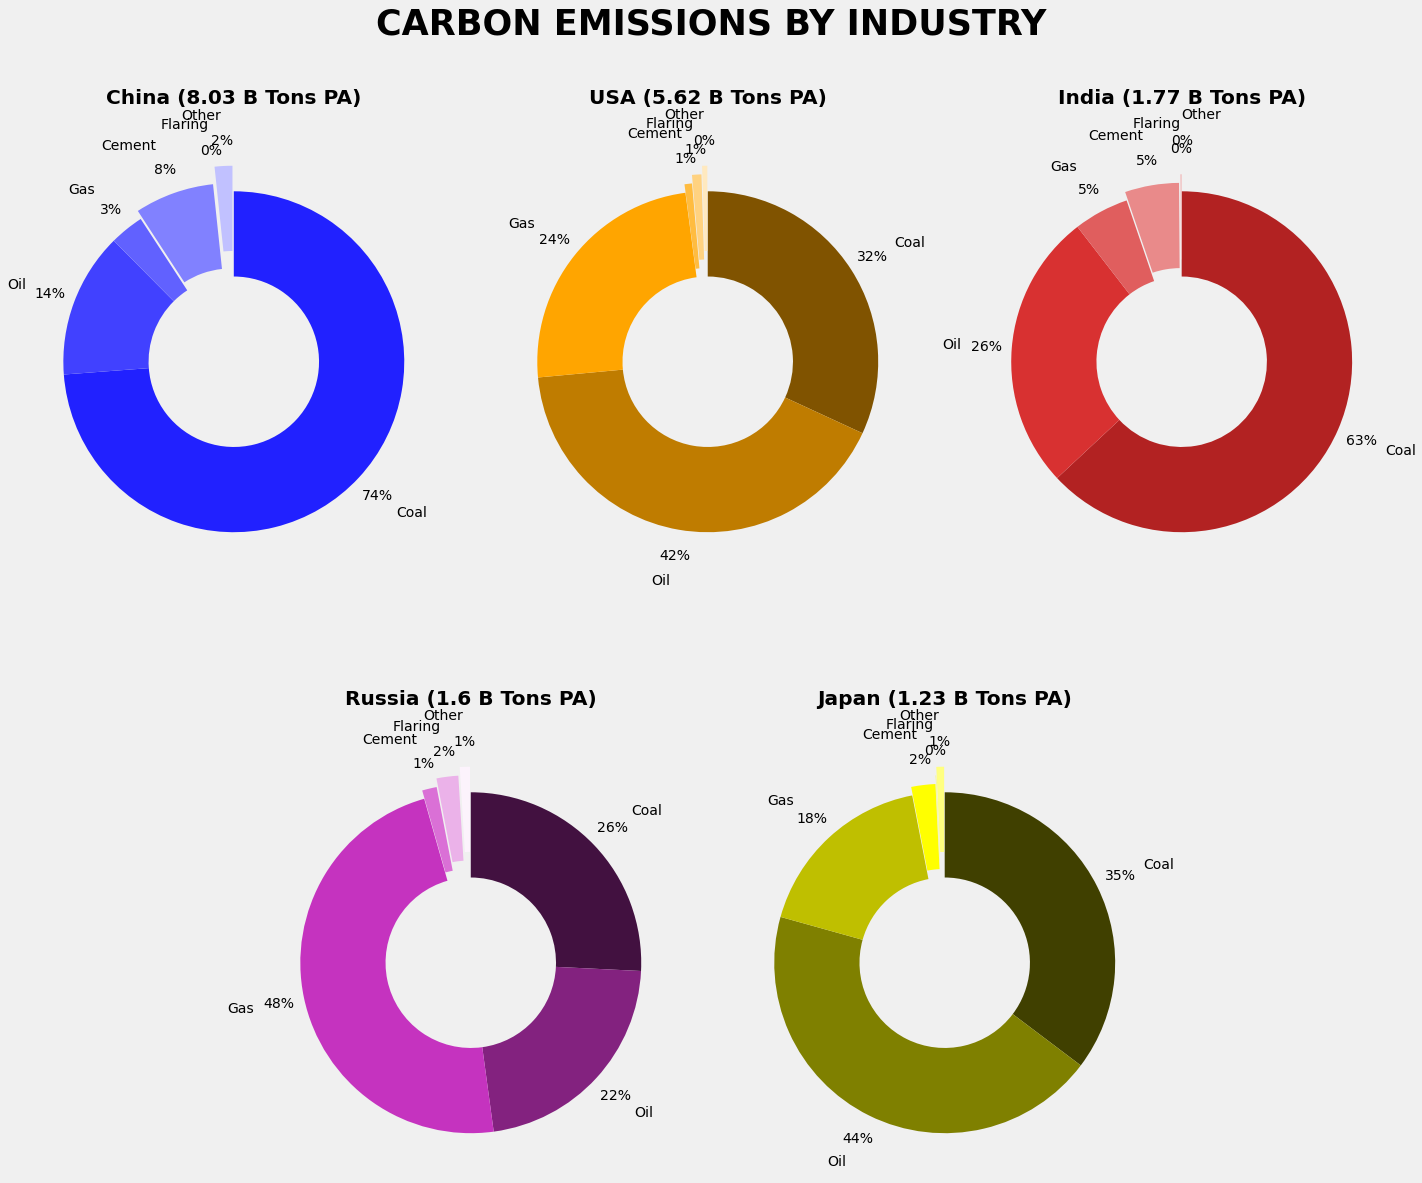

In [129]:
fig = plt.figure(figsize=(20,18))
# plt.rc('font', size=12.5)
plt.rcParams['axes.titlepad'] = 45
fontdict= {'fontweight':'bold'}
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

labels = list(indy.columns[3:])
explode =  (0, 0, 0, 0.05, 0.1, 0.15)
spects = [colors1, colors2, colors3, colors4, colors5]

for ax, x, spect in zip([ax1, ax2, ax3, ax4, ax5], range(5), spects):
    values = indy.iloc[x, 3:]
    ax.pie(values, labels=labels, colors = spect, autopct = '%1.0f%%', startangle=90, counterclock=False, pctdistance=1.15, labeldistance=1.3, wedgeprops=dict(width=0.5), explode=explode)
    ax.set_title("{} ({} B Tons PA)".format(indy.iloc[x]['Country'], round(indy.iloc[x]['Total'], 2)), fontdict= fontdict)

fig.suptitle("CARBON EMISSIONS BY INDUSTRY", size=35, weight='bold')
plt.tight_layout()
plt.show()

### Findings

Looking at the top 5 conutries contributing to more than half of global carbon emissions showed that emissions are mainly from the Coal, Oil and Gas industries.

China, with the highest emissions of average yearly emissions of 8.03 Billion metric tons, has 74% coming from coal. It is the world's largest manufacturer and most of China's industrial production is powered by coal.

Similarly, coal is the main energy source for India, supplying almost 50% of the energy in the country and given its large population, it makes sense that it would be a top 5 CO2 emmiting nation, with 63% of it being from coal and its processing into power.

Russia is renownned for its large natural gas deposits and it uses natural gas as its  primary source of energy and power generation therefore contributing to 48% of Russia's yearly average release of 1.8 Billion tons of CO2. Coal is also widely used in chemical and other basic material industries and for power generation in Russia. This explains the contributing 26% from the coal industry.


## Conclusion
### CO2 Emmisions Over the Years
The data suggested the start of a steep growth trend in total global CO2 emissions in 1950. Before this, there is a general low and constant emission rate. Between 1850 and 1960, the world's emissions increased steadily, owing mostly to industrialisation and population expansion, notably in the United States. This progression was only interrupted by historic events such as the Great Depression in the 1930s and the end of World War II in 1945. However, from the 1950s, China and Russia's emissions began to rise as their economies expanded [World Resources Institue](https://www.wri.org/insights/history-carbon-dioxide-emissions).

Since the significance value (p-value) for the Per Capita > 5%, there is no statistically significant evidence to show that there is difference in means between the two carbon emissions per capita in 1950 and 2020.

Although the total CO2 emissions increased significantly over the years, the trend of per capita emissions suggests that the growth rate of emissions is directly related to the increase in population over the years. This was proven by no statistically significant difference between the means of per capita emissions over the years.


### CO2 Emission and their Sources - Country and Industry
Out of about 230 countires, the top 5 CO₂ emmiting countries - USA, China, India, Russia and Japan - account for more than half of the Globe's emissions. The next highest contributor is international transport which accounts for 3% of the Globe's emissions.

Within these countries, 90-95% of their emissions are from the coal, oil and gas industries. Burning coal is the most significant contributor to anthropogenic CO2 emissions. Across all fossil fuels, coal is the most carbon-intensive. Given how inexpensive and ubiquitous a source of energy coal is, it has powered electricity grids for decades worldwide [Investopedia](https://www.investopedia.com/articles/investing/092915/5-countries-produce-most-carbon-dioxide-co2.asp).